In [1]:
import os
import pandas as pd
import numpy as np

## Read Dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,DATE,SALES
0,9/30/18,39
1,10/1/18,25
2,10/2/18,48
3,10/3/18,32
4,10/4/18,87


In [3]:
print("Total no. of datapoints",df.shape[0])
print("Total no. of datapoints",df.shape[1])

Total no. of datapoints 173
Total no. of datapoints 2


## Featurization using 'DATE' column

In [4]:
import datetime
df['Date'] = pd.to_datetime(df['DATE'])
#df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end
print(df.info)

<bound method DataFrame.info of         DATE  SALES       Date  year  month  day  dayofyear  weekofyear  \
0    9/30/18     39 2018-09-30  2018      9   30        273          39   
1    10/1/18     25 2018-10-01  2018     10    1        274          40   
2    10/2/18     48 2018-10-02  2018     10    2        275          40   
3    10/3/18     32 2018-10-03  2018     10    3        276          40   
4    10/4/18     87 2018-10-04  2018     10    4        277          40   
..       ...    ...        ...   ...    ...  ...        ...         ...   
168  3/21/19     32 2019-03-21  2019      3   21         80          12   
169  3/22/19     11 2019-03-22  2019      3   22         81          12   
170  3/23/19     22 2019-03-23  2019      3   23         82          12   
171  3/24/19     29 2019-03-24  2019      3   24         83          12   
172  3/25/19     14 2019-03-25  2019      3   25         84          13   

     weekday  quarter  is_month_start  is_month_end  
0          6 

<ipython-input-4-fa4613c452fb>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear


In [5]:
df = df.drop(['Date','DATE'], axis = 1)

df.head()

,SALES,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
0,39,2018,9,30,273,39,6,3,False,True
1,25,2018,10,1,274,40,0,4,True,False
2,48,2018,10,2,275,40,1,4,False,False
3,32,2018,10,3,276,40,2,4,False,False
4,87,2018,10,4,277,40,3,4,False,False


## Exploratory Data Analysis

In [6]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.02, 'month v/s sales')

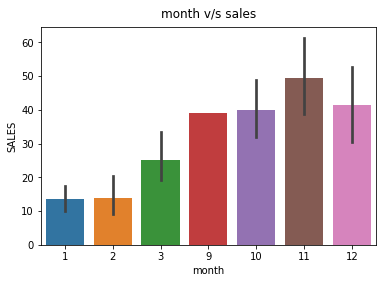

In [7]:
sns.barplot(x='month',y='SALES',data=df)
plt.title("month v/s sales",y=1.02)

Text(0.5, 1.02, 'quarter v/s sales')

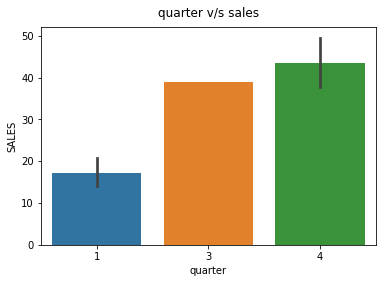

In [8]:
sns.barplot(x='quarter',y='SALES',data=df)
plt.title("quarter v/s sales",y=1.02)

Text(0.5, 1.02, 'weekday v/s sales')

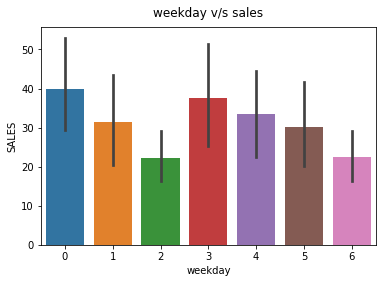

In [9]:
sns.barplot(x='weekday',y='SALES',data=df)
plt.title("weekday v/s sales",y=1.02)

In [10]:
# one hot encoding

In [11]:
df = pd.get_dummies(df, columns=['is_month_start'], drop_first=False, prefix='m_start')
df = pd.get_dummies(df, columns=['is_month_end'], drop_first=False, prefix='m_end')

In [12]:
df

,SALES,year,month,day,dayofyear,weekofyear,weekday,quarter,m_start_False,m_start_True,m_end_False,m_end_True
0,39,2018,9,30,273,39,6,3,1,0,0,1
1,25,2018,10,1,274,40,0,4,0,1,1,0
2,48,2018,10,2,275,40,1,4,1,0,1,0
3,32,2018,10,3,276,40,2,4,1,0,1,0
4,87,2018,10,4,277,40,3,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
168,32,2019,3,21,80,12,3,1,1,0,1,0
169,11,2019,3,22,81,12,4,1,1,0,1,0
170,22,2019,3,23,82,12,5,1,1,0,1,0
171,29,2019,3,24,83,12,6,1,1,0,1,0


## Train-Test Split

In [13]:
train=df.iloc[:138,:]
#val=df.iloc[111:138,:]
test=df.iloc[138:,:]

In [14]:
print(train.shape)
#print(val.shape)
print(test.shape)

(138, 12)
(35, 12)


In [15]:
y_train=train['SALES'].values
#y_val=val['SALES'].values
y_test=test['SALES'].values

In [16]:
X_train = train.drop(['SALES'], axis = 1)
#val = val.drop(['SALES'], axis = 1)
X_test = test.drop(['SALES'], axis =1)

In [17]:
X_train

,year,month,day,dayofyear,weekofyear,weekday,quarter,m_start_False,m_start_True,m_end_False,m_end_True
0,2018,9,30,273,39,6,3,1,0,0,1
1,2018,10,1,274,40,0,4,0,1,1,0
2,2018,10,2,275,40,1,4,1,0,1,0
3,2018,10,3,276,40,2,4,1,0,1,0
4,2018,10,4,277,40,3,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
133,2019,2,13,44,7,2,1,1,0,1,0
134,2019,2,14,45,7,3,1,1,0,1,0
135,2019,2,15,46,7,4,1,1,0,1,0
136,2019,2,16,47,7,5,1,1,0,1,0


In [18]:
print("Shape of features train data",X_train.shape)
print("Shape of target train data",y_train.shape)
print("Shape of features test data",X_test.shape)
print("Shape of target test data",y_test.shape)

Shape of features train data (138, 11)
Shape of target train data (138,)
Shape of features test data (35, 11)
Shape of target test data (35,)


## Random Forest

In [19]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [20]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
start=datetime.now()
param_dist = {"n_estimators":sp_randint(75,500),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(2,14),
              "min_samples_leaf": sp_randint(1,20)}

clf = RandomForestRegressor(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='neg_root_mean_squared_error',random_state=20)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])
print('Total time taken is {}'.format(datetime.now()-start))

mean test scores [-23.52587394 -23.2988855  -24.82148497 -23.54352903 -23.58814376]
Total time taken is 0:00:13.751127


In [21]:
print(rf_random.best_estimator_)

RandomForestRegressor(max_depth=14, min_samples_leaf=12, min_samples_split=8,
                      n_estimators=146, n_jobs=-1, random_state=25)


In [22]:
rfreg=RandomForestRegressor(n_estimators=332,max_depth=12,min_samples_leaf=12, min_samples_split=12,oob_score=True, n_jobs=-1,random_state=20)

In [23]:
rfreg.fit(X_train,y_train)
y_train_pred = rfreg.predict(X_train)
y_test_pred = rfreg.predict(X_test)

In [24]:
pred_train_rf= rfreg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
pred_test_rf = rfreg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))

21.242479661663964
20.126020189624665


## XGBoost Model

In [25]:
from xgboost import XGBRegressor
n_estimators = sp_randint(75,500) #[100,200,300,400,500,600,700,800,900]
max_depth = sp_randint(2,15) #[2,4,6,8,10,12,14,16,18]
params = {"n_estimators":n_estimators,"max_depth":max_depth}
xgb = XGBRegressor()
rsm = RandomizedSearchCV(xgb,params,cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1)
rsm.fit(X_train,y_train)
print("Best parameter obtained from RandomSearch CV: \n", rsm.best_params_)
print("Best Score : ", rsm.best_score_)

Best parameter obtained from RandomSearch CV: 
 {'max_depth': 5, 'n_estimators': 275}
Best Score :  -29.8697280725817


In [26]:
xgb=XGBRegressor(n_estimators=450,max_depth=4, n_jobs=-1)
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [27]:
pred_train_rf= xgb.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = xgb.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

0.010001056303625178
0.9999998742504934
23.306330402028212
-0.4914838817270555


## Predictions

In [28]:
import datetime

def create_features(datelist):
    df=pd.DataFrame()
    df['Date']=datelist
    df['Date'] = pd.to_datetime(df['Date'])
    #df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['month'] = pd.DatetimeIndex(df['Date']).month
    df['day'] = pd.DatetimeIndex(df['Date']).day
    df['dayofyear'] = pd.DatetimeIndex(df['Date']).dayofyear
    df['weekofyear'] = pd.DatetimeIndex(df['Date']).weekofyear
    df['weekday'] = pd.DatetimeIndex(df['Date']).weekday
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    df['is_month_start'] = pd.DatetimeIndex(df['Date']).is_month_start
    df['is_month_end'] = pd.DatetimeIndex(df['Date']).is_month_end
    return df

def create_dummies(df):
    df = pd.get_dummies(df, columns=['is_month_start'], drop_first=False, prefix='m_start')
    df = pd.get_dummies(df, columns=['is_month_end'], drop_first=False, prefix='m_end')
    return df

n=15
datelist=pd.date_range(start="2019-03-26",periods=n).to_pydatetime().tolist()
datelist=[date.strftime("%Y-%m-%d") for date in datelist]
df=create_features(datelist)
df=create_dummies(df)
date=df['Date'].values
df = df.drop(['Date'], axis = 1)
train_features=list(X_train.columns.values)
test_features=list(df.columns.values)
for tr_feat in train_features:
    if tr_feat not in test_features:
        idx=train_features.index(tr_feat)
        df.insert(loc=idx,column=tr_feat,value=[0]*len(df))
predictions = rfreg.predict(df)
predictions=predictions.astype('int32')
df=pd.DataFrame()
df['Date']=date
df['Predictions']=predictions
print(df)

         Date  Predictions
0  2019-03-26           27
1  2019-03-27           26
2  2019-03-28           26
3  2019-03-29           26
4  2019-03-30           24
5  2019-03-31           24
6  2019-04-01           33
7  2019-04-02           33
8  2019-04-03           32
9  2019-04-04           34
10 2019-04-05           34
11 2019-04-06           32
12 2019-04-07           29
13 2019-04-08           31
14 2019-04-09           31
